Names: Cas Hoekstra, Rohan Zonneveld and Joost Driessen. The common letter in these three names is the letter 'r'. Thus it makes sense to choose the vectors from the (p,q,r)-row. These vectors are U(45,2), V(35,39) and (15,60). 

In [106]:
import numpy as np
import random
from math import sqrt
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator

def calc_distance(x,u):
    distance = np.log(3 + 3 * (x[0] - u[0])**2 + 1.5 * (x[1] - u[1])**2)
    return distance

def calc_diff(x):
    u = (45,2)
    v = (35,39)
    w = (15,60)
    diff = calc_distance(x,u) + calc_distance(x,v) + calc_distance(x,w)
    return diff

In [107]:


diff = []
for i in range(20):
    nr = (random.randint(0,100), random.randint(0,100))
    diff.append(calc_diff(nr))

max_diff = max(diff)
min_diff = min(diff)
mean_diff = np.mean(diff)
print('The highest difference is: ' + str(max_diff))
print('The lowest difference is: ' + str(min_diff))
print('The mean diffence is: ' + str(mean_diff))

The highest difference is: 28.861123018731092
The lowest difference is: 21.20074929954867
The mean diffence is: 25.195818830225598


Random search could be a decent way to minimize this function if your search space is small enough. However it will never be the superior way.

In [108]:
x0 = (50,50)
diff1 = calc_diff(x0)
diff2 = calc_diff((50,50))

if diff1 == diff2:
    print('diff1 and diff2 are the same')
else:
    print('diff1 and diff2 are not the same')

diff1 and diff2 are the same


In [109]:
def calc_grad(x):
    delta = 0.001
    diff = calc_diff(x)
    grad1 = calc_diff((x[0]+delta, x[1]))
    grad2 = calc_diff((x[0], x[1] + delta))
    grad = ((grad1-diff)/delta, (grad2-diff)/delta)
    return grad

In [110]:
x1 = (0,0)
x2 = (100,0)
x3 = (0,100)
x4 = (100,100)

x_list = [x1,x2,x3,x4]

grad_list = []
for x in x_list:
    grad_list.append(calc_grad(x))

min_grad_size = 100
idx = 0
for grad in grad_list:
    grad_size = sqrt(grad[0]**2 + grad[1]**2)
    if grad_size < min_grad_size:
        min_grad_size = grad_size
        min_idx = idx
    idx += 1

print('There could be a minimum around vector {}'.format(x_list[min_idx]))


There could be a minimum around vector (100, 100)


One vector gives two gradients, one for the x and one for the y. These gradients combined produce a new vector starting from the initial vector. The size of this vector tells us something about the steepness of the landscape at that point. If the size is large, it is steeper than when it is low. So in order to find a minimum (or maximum) you have to find a point where the vector produced by these gradients is close to zero. In the code above the size of the gradients at the four vectors is calculated and the smallest of these four has the highest probability to be around a minimum or maximum. 

In [111]:
def calc_xnext(x, grad, step_size):
    xnext = (x[0] - (grad[0] * step_size), x[1] - (grad[1] * step_size))
    return xnext

xzero = (50,50)
step_size = 1
xnext = calc_xnext(xzero, calc_grad(xzero), step_size)
print(xnext)

(49.83194195966618, 49.92869458284872)


In [112]:
def find_local_minimum(x, step_size):
    diff = []
    x = [x]
    tolerance = 10
    while tolerance > 0.001:
        diff.append(calc_diff(x[-1]))
        print('x = {}, diff(x) = {}'.format(x[-1],diff[-1]))
        if len(diff) > 1:
            tolerance_new = abs(diff[-1] - diff[-2])
            if tolerance_new >= tolerance:
                step_size = step_size / 2
            tolerance = tolerance_new 
        x.append(calc_xnext(x[-1], calc_grad(x[-1]),step_size))

    x.pop() # Final calculated x is not used
    return x, diff

# for x0 = (50,50)
x_list0,diff_list0 = find_local_minimum(xzero,step_size)
        
    

x = (50, 50), diff(x) = 23.17663423027539
x = (49.83194195966618, 49.92869458284872), diff(x) = 23.143209532007447
x = (49.66295714651565, 49.85685971891769), diff(x) = 23.109393860754523
x = (49.57799085726862, 49.820670735502404), diff(x) = 23.092310415324597
x = (49.49278318215384, 49.784343130926345), diff(x) = 23.0751243269979
x = (49.450057254113844, 49.76610909615182), diff(x) = 23.066485764906023
x = (49.40726969880167, 49.74783956888391), diff(x) = 23.057820890518503
x = (49.3858449270987, 49.73868693913026), diff(x) = 23.05347686242888
x = (49.364404583879654, 49.72952532792103), diff(x) = 23.049126172205007
x = (49.3536766035911, 49.7249400163033), diff(x) = 23.046947902319726
x = (49.342944709539665, 49.72035244554114), diff(x) = 23.044767956224252
x = (49.337576802743826, 49.71805752865806), diff(x) = 23.043677248562048
x = (49.3322079148781, 49.71576204525115), diff(x) = 23.042586120501987
x = (49.32952298004763, 49.71461402004325), diff(x) = 23.042040372388165


In [113]:
# for x0 = (0,0)
x_list1,diff_list1 = find_local_minimum((0,0),1)

x = (0, 0), diff(x) = 26.118590490778683
x = (0.09442428135386649, 0.050233604422800227), diff(x) = 26.107143853650705
x = (0.18895008432195937, 0.1005667778706254), diff(x) = 26.0956679935638
x = (0.2362638529831429, 0.12578328686529971), diff(x) = 26.089917234802726
x = (0.283603105376784, 0.15102481472695217), diff(x) = 26.08415912360401
x = (0.30728548676783873, 0.16365810530860614), diff(x) = 26.081276845827304
x = (0.3309742520372083, 0.17629766643434408), diff(x) = 26.07839272407864
x = (0.3428218282790496, 0.18262058442131135), diff(x) = 26.076949855779215
x = (0.35467100211095115, 0.18894507202382727), diff(x) = 26.075506525752296
x = (0.3605963880304319, 0.19210810090153352), diff(x) = 26.07478465864707


In [114]:
# for x0 = (100,100)
x_list2,diff_list2 = find_local_minimum((100,100),1)


x = (100, 100), diff(x) = 29.965569228196806
x = (99.94340810792437, 99.9724747878247), diff(x) = 29.961607790795554
x = (99.88678733979697, 99.94492521936706), diff(x) = 29.957641740244775
x = (99.85846249600563, 99.93113823333246), diff(x) = 29.955656692569242
x = (99.8301304129491, 99.91734513680797), diff(x) = 29.953670487201823
x = (99.81596074906332, 99.91044553032626), diff(x) = 29.952676877506775


ValueError: Argument Z must be 2-dimensional.

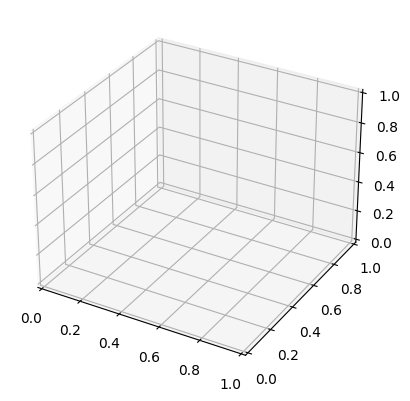

In [129]:
# Make visualisations
fig, ax = plt.subplots(subplot_kw  = {'projection' : '3d'})
# joined_x_list = x_list0 + x_list1 + x_list2
# joined_diff_list = diff_list0 + diff_list1 + diff_list2
# xline = []
# yline = []
# for x in joined_x_list:
#     xline.append(x[0])
#     yline.append(x[1])

# Make a grid of the search space
coordinates = []
for i in range(101):
    for j in range(101):
        coordinates.append((i,j))
coordinates = np.asarray(coordinates)

diff_list = []
xline = []
yline = []
for c in coordinates:
    diff_list.append(calc_diff(c))
    xline.append(c[0])
    yline.append(c[1])

xline = np.asarray(xline)
yline = np.asarray(yline)
diff_list = np.asarray(diff_list)


# X, Y = np.meshgrid(xline, yline)

surf = ax.plot_surface(xline,yline,diff_list, cmap = cm.coolwarm,
                       linewidth = 0, antialiased = False)
                       
# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()



[-5.   -4.75 -4.5  -4.25 -4.   -3.75 -3.5  -3.25 -3.   -2.75 -2.5  -2.25
 -2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75  3.    3.25  3.5   3.75
  4.    4.25  4.5   4.75]
[[-5.   -4.75 -4.5  ...  4.25  4.5   4.75]
 [-5.   -4.75 -4.5  ...  4.25  4.5   4.75]
 [-5.   -4.75 -4.5  ...  4.25  4.5   4.75]
 ...
 [-5.   -4.75 -4.5  ...  4.25  4.5   4.75]
 [-5.   -4.75 -4.5  ...  4.25  4.5   4.75]
 [-5.   -4.75 -4.5  ...  4.25  4.5   4.75]]


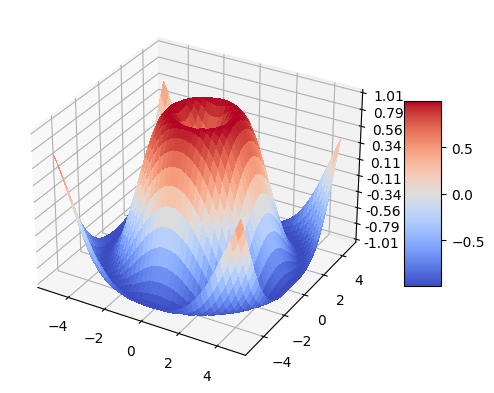

In [127]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
print(X)
X, Y = np.meshgrid(X, Y)
print(X)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
# print(type(X))
# print(type(Z))
# print(Z[0])
# print(len(Z))

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()